In [1]:
#!apt update > /dev/null 2>&1
#!apt install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
import sys
#!conda install --yes --prefix "{sys.prefix}" ipywidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
F_SCALE = 2

In [4]:
def func(x):
    y = np.sin(5*x) * np.sin(3*x + 0.3) * np.cos(1.5 * x + 0.5) * F_SCALE
    y[x < -np.pi] = 0
    y[x > np.pi] = 0
    return y

def mu_grad_func(x, y, mu, sigma):
    return -y * (mu - x) / sigma**2

def sigma_grad_func(x, y, mu, sigma):
    return -y * (1 / sigma - (mu - x)**2 / sigma**3)

def normal_pdf(xs, mu, sigma):
    return np.e**(-0.5 * ((xs - mu)/sigma)**2) / ((2 * np.pi)**0.5 * sigma)

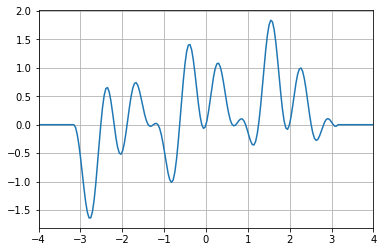

In [5]:
xs = np.linspace(-4, 4, 200)
plt.plot(xs, func(xs))
plt.xlim(xs[0], xs[-1])
plt.grid()
plt.show()

In [6]:
def build_plot(x, mu, sigma):
    y = func(np.array([x]))[0]
    xs = np.linspace(-4, 4, 150)
    ys = func(xs)
    pdf = normal_pdf(xs, mu, sigma)
    plt.figure(figsize=(12,8))
    plt.xlim(-4, 4)
    plt.ylim(-F_SCALE, F_SCALE)
    plt.grid()

    mu_next = mu + mu_grad_func(x, y, mu, sigma)
    sigma_next = max(sigma + sigma_grad_func(x, y, mu, sigma), 0.01)
    pdf_next = normal_pdf(xs, mu_next, sigma_next)
    plt.plot(xs, 0.5 * F_SCALE * pdf_next, linestyle="-.", color=(0.7, 0.7, 0.7))
    plt.plot([mu_next, mu_next], [-F_SCALE, F_SCALE], linestyle="-.", color=(0.7, 0.7, 0.7))

    plt.plot(xs, 0.5 * F_SCALE * pdf, linestyle="-.", color=(0.9, 0.1, 0.1))
    plt.plot([mu, mu], [-F_SCALE, F_SCALE], linestyle="-.", color=(0.9, 0.1, 0.1))
    plt.plot(xs, ys, color=(0.1, 0.1, 0.9))
    plt.scatter([x], [y], color=(0., 0., 0.))

    plt.show()
    

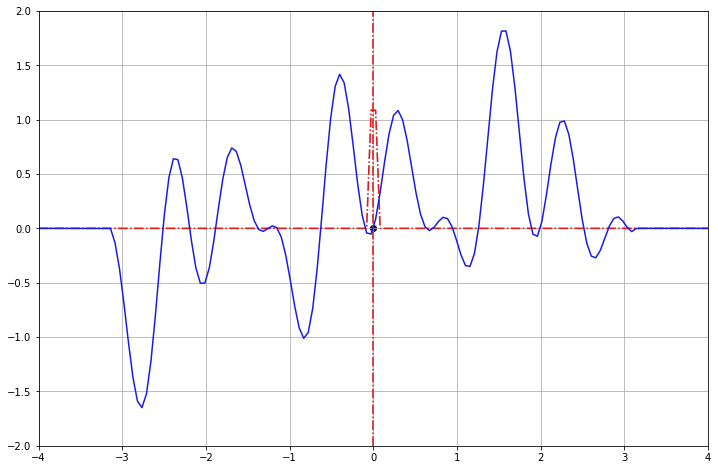

<function __main__.build_plot(x, mu, sigma)>

In [7]:
widgets.interact(build_plot, 
                 x=widgets.FloatSlider(min=-4, max=4, step=0.01), 
                 mu=widgets.FloatSlider(min=-4, max=4, step=0.01), 
                 sigma=widgets.FloatSlider(min=0.01, max=4, step=0.01))